## DBSCAN example code and then BSCAN with a correlation matrix

### Trying DBSCAN example code

see the 'Clustering algorithms' section of [Avoiding common pitfalls when clustering biological data](https://stke.sciencemag.org/content/9/432/re6) for background about DBSCAN algorithm and how it is a density-based algorithm. 

Implementation in Python is from https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html .

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


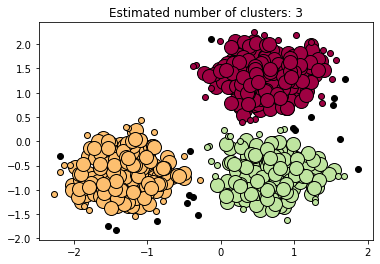

In [1]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
# `labels_true` in next few lines are the cluster labels defined `make_blobs()` 
# that generated the mock data and so is being used to compare expected with 
# result from DBSCAN calling cluster membership.
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

------

### Trying DBSCAN with a correlation matrix

Combining a correlation matrix as a dataframe and https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html

Builds a lot on my notebook `Correlation matrix clustering featuring heatmap plot with seaborn.ipynb`.

-----

First make a dataframe that has 3 clusters. Based on https://github.com/TheLoneNut/CorrelationMatrixClustering/blob/master/CorrelationMatrixClustering.ipynb , see my notebook `Correlation matrix clustering featuring heatmap plot with seaborn.ipynb`.

In [2]:
import pandas as pd
import numpy as np

# Generate 50 variables with 1000 samples
n_variables = 50
n_samples = 1000

# Those variables will be spread over 3 clusters of variable sizes
cluster_size = [5,22,28]
n_clusters = len(cluster_size)

# Assign each variable to a cluster
belongs_to_cluster = [i for i, c in enumerate(cluster_size) for n in range(c)]
np.random.shuffle(belongs_to_cluster)

# This latent data is used to make variables that belong
# to the same cluster correlated.
latent = np.random.randn(n_clusters, n_samples)

variables = []
for i in range(n_variables):
    variables.append(np.random.randn(n_samples) + latent[belongs_to_cluster[i], :])

df = pd.DataFrame(np.array(variables).transpose())

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-2.666053,-0.400954,1.682817,0.326723,-0.592203,-3.219180,-0.999375,-2.610267,-1.978013,0.162106,...,0.251127,0.720746,-0.051416,-3.704366,-3.107924,0.300466,-1.029804,-0.352601,-2.319535,1.729214
1,-0.216039,-1.309279,0.088634,-0.470252,-0.565535,-2.023985,1.696726,-2.173936,-0.555458,-1.860361,...,-1.143471,-0.003896,-1.312842,-0.722984,0.781711,0.878375,-1.686086,-0.505378,-1.197133,-2.939640
2,0.499367,1.686939,0.953388,2.906879,-0.702799,0.631374,-0.357824,0.406195,1.333885,0.812548,...,0.707483,1.031942,0.882335,-0.521383,-0.436805,-1.152387,0.004813,0.115095,1.203829,2.325762
3,-2.966709,-1.306831,-1.692364,1.768224,-0.844917,-2.188820,0.150473,-1.834231,-2.350628,0.811344,...,-0.532799,1.098788,-1.270899,-2.452000,-1.283082,0.236145,-2.264452,-2.405748,-0.929202,0.432167
4,0.067122,-0.936009,-1.630019,0.019027,0.108534,1.549290,0.208429,1.563777,-0.748334,0.262853,...,-0.200206,1.198888,-1.074077,1.080271,0.150371,1.467938,-0.806113,0.530310,0.836067,0.973924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.146445,-3.079153,-2.616804,0.509180,2.527784,2.172334,-2.416523,0.333352,-0.607240,0.589288,...,-1.832465,-0.129141,-1.602185,2.520151,0.951632,2.367750,-1.517132,0.784273,0.954490,-0.568177
996,0.513202,-1.009715,-1.210212,0.044300,-0.381731,-0.580754,-0.508748,-0.556464,1.104958,0.453469,...,1.475398,0.298568,-0.548647,0.868094,1.051423,1.168084,1.301898,0.750877,1.322145,-0.135741
997,-0.696008,-1.351403,-0.632019,-0.417978,-1.404639,-1.499811,-0.372505,-0.659895,-1.166564,-0.986041,...,-0.419568,-0.519591,-3.987524,0.321848,-1.102152,-0.387658,-1.831305,1.008141,-1.023263,-1.468111
998,-1.017693,0.449614,-1.244709,-1.249176,1.510112,-0.952583,-0.881777,-0.317314,-2.471065,-1.113999,...,-0.275986,-1.588758,-0.114972,-1.822763,-1.764240,0.172199,0.539180,4.729687,0.071033,-1.654435


So DBSCAN takes distance matrix. **Can I use Scipy one or do I need scikit-learn one?**

(Note see below where `min_samples` should have been 4 since small grouping in mock data used as input was five. Also, cluster membership of the labels is displayed there, too.)

In [4]:
import scipy
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from sklearn import metrics

dfX = df.corr().values
X = sch.distance.pdist(dfX)   # vector of ('55' choose 2) pairwise distances



db = DBSCAN(eps=0.3, min_samples=10).fit(X.reshape(-1, 1)) #see discussion where `min_samples` should have been 4!
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
#print(labels)  #FOR DEBUGGING

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

labels_true = False
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

for x in np.unique(labels):
    class_members = [xc for xc in labels if xc == x]
    print(f"{len(class_members)} variables in grouping {x}")

Estimated number of clusters: 2
Estimated number of noise points: 0
719 variables in grouping 0
506 variables in grouping 1


In [5]:
import scipy
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from sklearn import metrics


dfX = df.corr().values
X = metrics.pairwise_distances(dfX) 


db = DBSCAN(eps=2.1, min_samples=10).fit(X) #see discussion where `min_samples` should have been 4!
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
#print(labels)  #FOR DEBUGGING

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

labels_true = False
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

for x in np.unique(labels):
    class_members = [xc for xc in labels if xc == x]
    print(f"{len(class_members)} variables in grouping {x}")

Estimated number of clusters: 2
Estimated number of noise points: 5
5 variables in grouping -1
19 variables in grouping 0
26 variables in grouping 1


Get different result when use scikit-learn one vs. the scipy one (see [Hierarchical_clustering.ipynb](Hierarchical_clustering.ipynb) and https://github.com/TheLoneNut/CorrelationMatrixClustering/blob/master/CorrelationMatrixClustering.ipynb) and since get more correct result with scikit-learn one, seems I need to use that. I think the compatibility of the distance matrix is a problem with going from scipy to scikit-learn because it said deminsions weird without reshape (gives: `ValueError: Expected 2D array, got 1D array instead:
array=[0.76702317 3.62185855 3.72325572 ... 0.71381976 3.71357796 3.77027178].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.` and although scipy one gives number of clusters close, the size of those clusters is huge (like 1000 of elements) as if it isn't using correct vectors?

Now how do I plot the result though??? Using the code from [DBSCAN demo](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html) with the dataframe is causing an issue. **UPDATE**: I realized that the code from the [DBSCAN demo](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html) was simply plotting the values of the points in 2D space, because the values were 2 dimensional, and color coding then according to which cluster they fell in. The demo from the correlated matrix was just the observations for each and how it correlated with the other measures. So it really was only a single value and no x and y to plot. And so that was why code directly from the demo won't work.   
In fact, the way I was plotting the relationship in my notebook [Hierarchical_clustering.ipynb](Hierarchical_clustering.ipynb) might be more pertinent here. I could arrange the columns according to the clustering results from the correlation matrix and use that has a heatmap. (I wonder if I should go back and color the correlation matrix results by the cluster they were put in as well as a visualization?)

The trick to going to the heatmap plot is to realize that for DBSCAN, the labels (specifically `db.labels_`) are like the `ind` index from the correlation matrix clustering example.

In [6]:
import seaborn as sns
def plot_corr(df,size=10):
    '''Plot a graphical correlation matrix for a dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
        
    based on https://github.com/TheLoneNut/CorrelationMatrixClustering/blob/master/CorrelationMatrixClustering.ipynb
    and converted to using Seaborn 
    and adding plotting only lower triangular of the matrix
    by Wayne 6-10-2020
    '''
    
    %matplotlib inline
    import matplotlib.pyplot as plt

    # Compute the correlation matrix for the received dataframe
    corr_df = df.corr()
    
    # make the mask based on https://cmdlinetips.com/2020/02/lower-triangle-correlation-heatmap-python/
    mask_ut=np.triu(np.ones(corr_df.shape)).astype(np.bool)
    #print( mask_ut)  # FOR DEBUGGING
    
    # Plot the correlation matrix
    '''
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='RdYlGn')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
    # Add the colorbar legend
    cbar = fig.colorbar(cax, ticks=[-1, 0, 1], aspect=40, shrink=.8)
    '''
    # Plot the correlation matrix
    fig, ax = plt.subplots(figsize=(size+2, size))
    sns.heatmap(corr_df, mask=mask_ut, cmap="RdYlGn")

Note see below where `min_samples` should have been 4!

Estimated number of clusters: 2
Estimated number of noise points: 5
5 variables in grouping -1
19 variables in grouping 0
26 variables in grouping 1


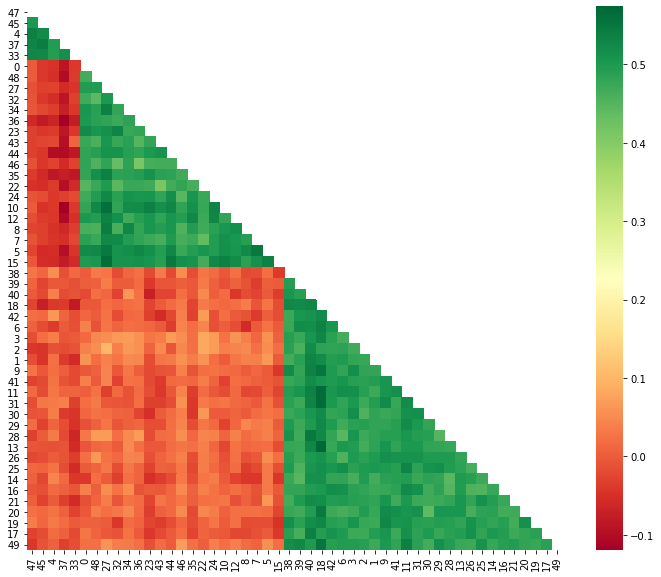

In [7]:
import scipy
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from sklearn import metrics


dfX = df.corr().values
X = metrics.pairwise_distances(dfX) 


db = DBSCAN(eps=2.1, min_samples=10).fit(X) #see discussion where `min_samples` should have been 4!
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
#print(labels)  #FOR DEBUGGING

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

labels_true = False
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
for x in np.unique(labels):
    class_members = [xc for xc in labels if xc == x]
    print(f"{len(class_members)} variables in grouping {x}")

columns = [df.columns.tolist()[i] for i in list((np.argsort(labels)))]
df_clustered = df.reindex(columns, axis=1) # this line updated from source because `df.reindex_axis()` deprecated
plot_corr(df_clustered, size=10)

To compare to **hierarchical clustering result below** (worked out in my notebook [Hierarchical_clustering.ipynb](Hierarchical_clustering.ipynb)):

number of clusters determined: 3
26 variables in cluster 1
5 variables in cluster 2
19 variables in cluster 3


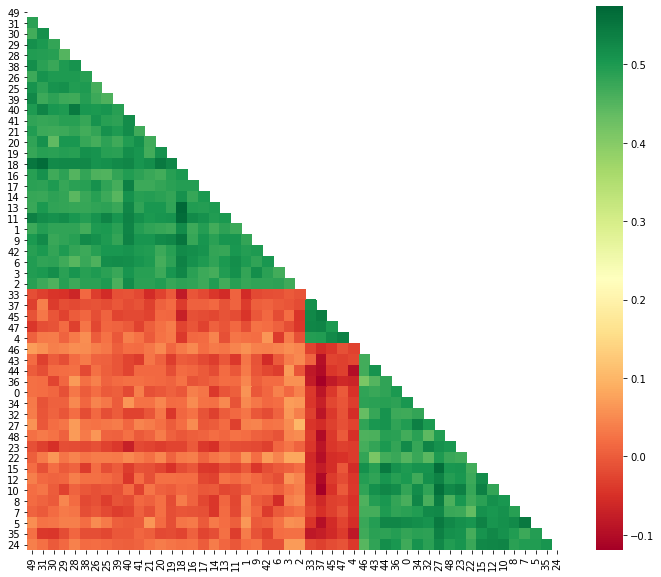

In [8]:
# hierarchical clustering  <--- FOR comparing to DBSCAN result
import scipy
import scipy.cluster.hierarchy as sch


X = df.corr().values
d = sch.distance.pdist(X)   # vector of ('55' choose 2) pairwise distances
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [df.columns.tolist()[i] for i in list((np.argsort(ind)))]
df_clustered_hc = df.reindex(columns, axis=1) # this line updated from source because `df.reindex_axis()` deprecated

print("number of clusters determined:",len(np.unique(ind)))
for x in np.unique(ind):
    class_members = [xc for xc in ind if xc == x]
    print(f"{len(class_members)} variables in cluster {x}")


plot_corr(df_clustered_hc, size=10)

The smallest cluster is the easiest to compare since the indices are so few the members are't overly confusing to compare. DBSCAN clearly calls this grouping with members the same as the hierarchical clustering results except that DBSCAN calls this small group as 'noise points' whereas it was defined in the made-up data as an actual cluster. (Maybe this can be made to be an actual group by adjusting `min_samples` setting instead of using the one in the demo? ==> See below.)  Many of the other members are the same in the larger groups.  This visualization (worked out in my notebook [Hierarchical_clustering.ipynb](Hierarchical_clustering.ipynb)) shows that (;see the cell below that for code tht generates text based listing of members).

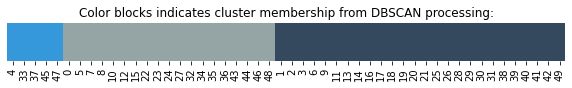

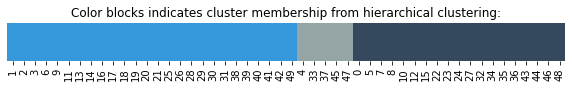

In [9]:
# Visualize members for each
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data for DBSCAN
data4df = labels
df4view = pd.DataFrame(data4df)  #<--- note DO NOT USE `pd.DataFrame.from_records` here
df4view = df4view.T
labels4df = sorted(list(df_clustered.columns))
df4view.columns = labels4df
df4viewreoriented = df4view.T
df4viewreoriented = df4viewreoriented.rename_axis('sample_ids')
df4viewreoriented.columns = ["cluster_num"]
df4viewreoriented = df4viewreoriented.sort_values(by = ['cluster_num', 'sample_ids'], ascending = [True, True])
df4view = df4viewreoriented.T

# Plot after data preparation
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"] # from https://seaborn.pydata.org/tutorial/color_palettes.html
flatui = [ "#3498db", "#9b59b6", "#95a5a6", "#2ecc71","#34495e"] # based on https://seaborn.pydata.org/tutorial/color_palettes.html
plt.figure(figsize=(10, 0.7)) #from https://stackoverflow.com/a/55173418/8508004
g = sns.heatmap(df4view, cmap=flatui,cbar=False) # hiding colorbar based 
# on https://stackoverflow.com/q/50454360/8508004

g.set_yticklabels([""]) 
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the left edge are off
)
g.set_xlabel("") # when added column name to make the sorting work I had to then turn off;
# used approach like mentioned above for determining `g.set_yticklabels([""])` above

plt.title("Color blocks indicates cluster membership from DBSCAN processing:");

# Prepare the data for hierarchichal clustering
data4df = ind
df4view = pd.DataFrame(data4df)  #<--- note DO NOT USE `pd.DataFrame.from_records` here
df4view = df4view.T
labels4df = sorted(list(df_clustered_hc.columns))
df4view.columns = labels4df
df4viewreoriented = df4view.T
df4viewreoriented = df4viewreoriented.rename_axis('sample_ids')
df4viewreoriented.columns = ["cluster_num"]
df4viewreoriented = df4viewreoriented.sort_values(by = ['cluster_num', 'sample_ids'], ascending = [True, True])
df4view = df4viewreoriented.T

# Plot after data preparation
plt.figure(figsize=(10, 0.7)) #from https://stackoverflow.com/a/55173418/8508004
g = sns.heatmap(df4view, cmap=flatui,cbar=False) # hiding colorbar based 
# on https://stackoverflow.com/q/50454360/8508004

g.set_yticklabels([""])
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the left edge are off
)
g.set_xlabel("")
plt.title("Color blocks indicates cluster membership from hierarchical clustering:");

Although the label of the clusters are different and so the exact order of the different clusters is different betwen the two plots, the groupinngs are clearly the same.

Trying **DBSCAN** with `min_samples` as `4` instead of using the one in the demo?

Estimated number of clusters: 3
Estimated number of noise points: 0
19 variables in grouping 0
26 variables in grouping 1
5 variables in grouping 2
Cluster breakdown:
The 19 members of cluster 0 are: [0, 5, 7, 8, 10, 12, 15, 22, 23, 24, 27, 32, 34, 35, 36, 43, 44, 46, 48]
The SORTED 19 members of cluster 0 are: [0, 5, 7, 8, 10, 12, 15, 22, 23, 24, 27, 32, 34, 35, 36, 43, 44, 46, 48]
The 26 members of cluster 1 are: [1, 2, 3, 6, 9, 11, 13, 14, 16, 17, 18, 19, 20, 21, 25, 26, 28, 29, 30, 31, 38, 39, 40, 41, 42, 49]
The SORTED 26 members of cluster 1 are: [1, 2, 3, 6, 9, 11, 13, 14, 16, 17, 18, 19, 20, 21, 25, 26, 28, 29, 30, 31, 38, 39, 40, 41, 42, 49]
The 5 members of cluster 2 are: [4, 33, 37, 45, 47]
The SORTED 5 members of cluster 2 are: [4, 33, 37, 45, 47]


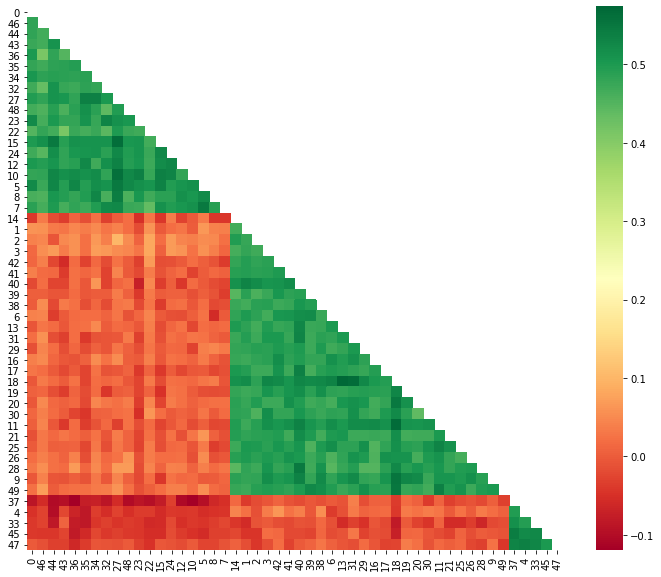

In [10]:
import scipy
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from sklearn import metrics


dfX = df.corr().values
X = metrics.pairwise_distances(dfX) 


db = DBSCAN(eps=2.1, min_samples=4).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
#print(labels)  #FOR DEBUGGING

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

labels_true = False
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
for x in np.unique(labels):
    class_members = [xc for xc in labels if xc == x]
    print(f"{len(class_members)} variables in grouping {x}")
# Membership report-lite (based on code first worked out under 
# 'Obtaining and viewing the cluster membership without the rest of plot' section of 
# my notebook `Correlation matrix clustering featuring heatmap plot with seaborn.ipynb`.)
clusterBYindex = zip(labels.tolist(),df.columns)
from collections import defaultdict 
cluster_assignments = defaultdict(list)
for x in clusterBYindex:
    cluster_assignments[x[0]].append(x[1])
print("Cluster breakdown:")
for k,v in cluster_assignments.items():
    print(f"The {len(v)} members of cluster {k} are: {v}")
    print(f"The SORTED {len(v)} members of cluster {k} are: {sorted(v)}")

columns = [df.columns.tolist()[i] for i in list((np.argsort(labels)))]
df_clustered = df.reindex(columns, axis=1) # this line updated from source because `df.reindex_axis()` deprecated
plot_corr(df_clustered, size=10)

Now the `noise points` when setting `min_samples` is 10 are an actual called as a cluster. Improvement!

----

----